In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV data as Pandas Dataframe

In [2]:
df = pd.read_csv("data/stud.csv")

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the dataset

## Check Duplicates

In [6]:
df.duplicated().sum()

0

### There are no duplicate values in the data sets

### Check Data Types

In [7]:
# check null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Check the Statistics of Datasets

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### -From above description of numerical data, all means are very close to each other - between 66 and 68.05;
##### -All standard deviations are also close - between 14.6 and 15.19
##### -While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading much higher = 17

## Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns for 'Total Score' and 'Average'

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = round(df['total_score']/3,2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 in Writing: {writing_less_20}')
print(f'Number of students with less than 20 in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 in Writing: 3
Number of students with less than 20 in Reading: 1


### 4.1.1 Histogram & KDE

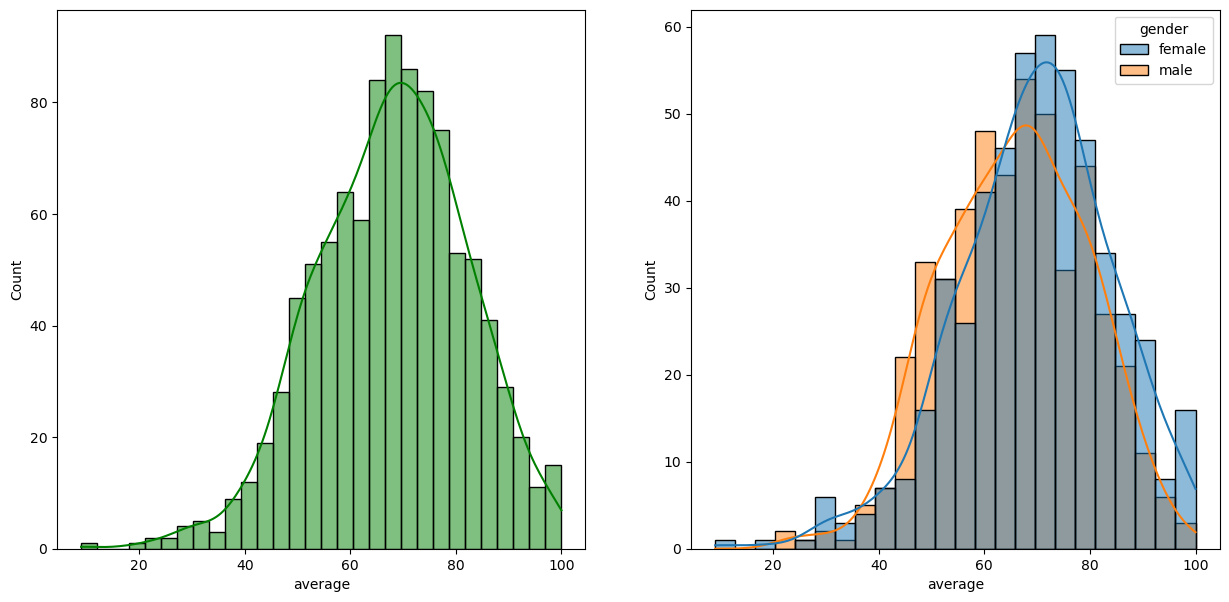

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data = df,x='average',kde = True,hue='gender')
plt.show()

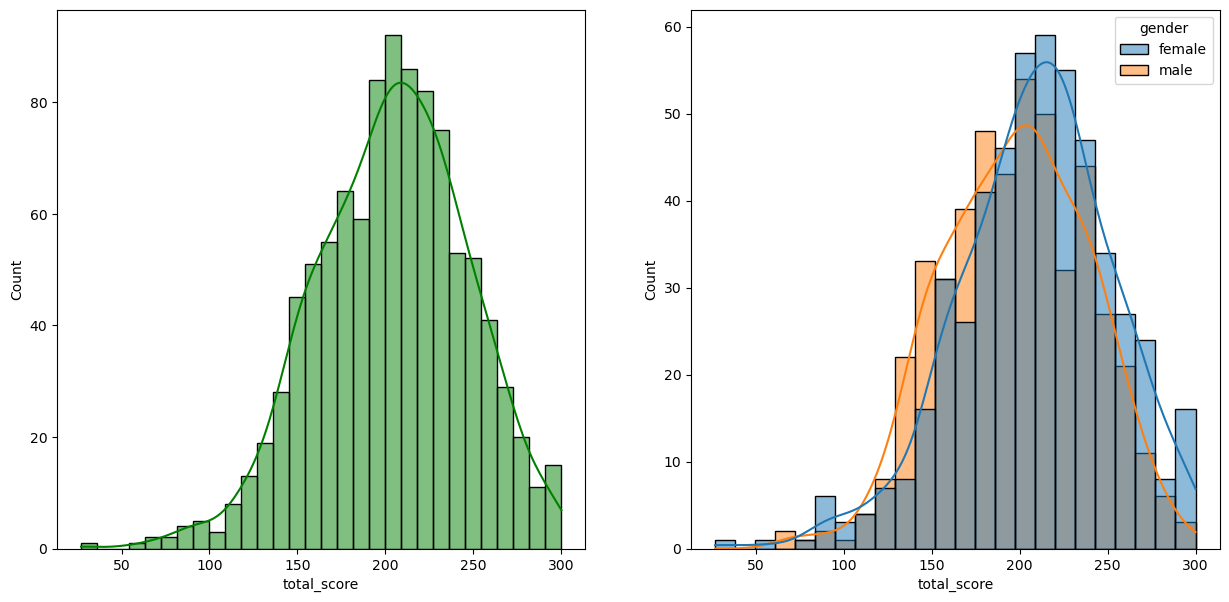

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data = df,x='total_score',kde = True,hue='gender')
plt.show()

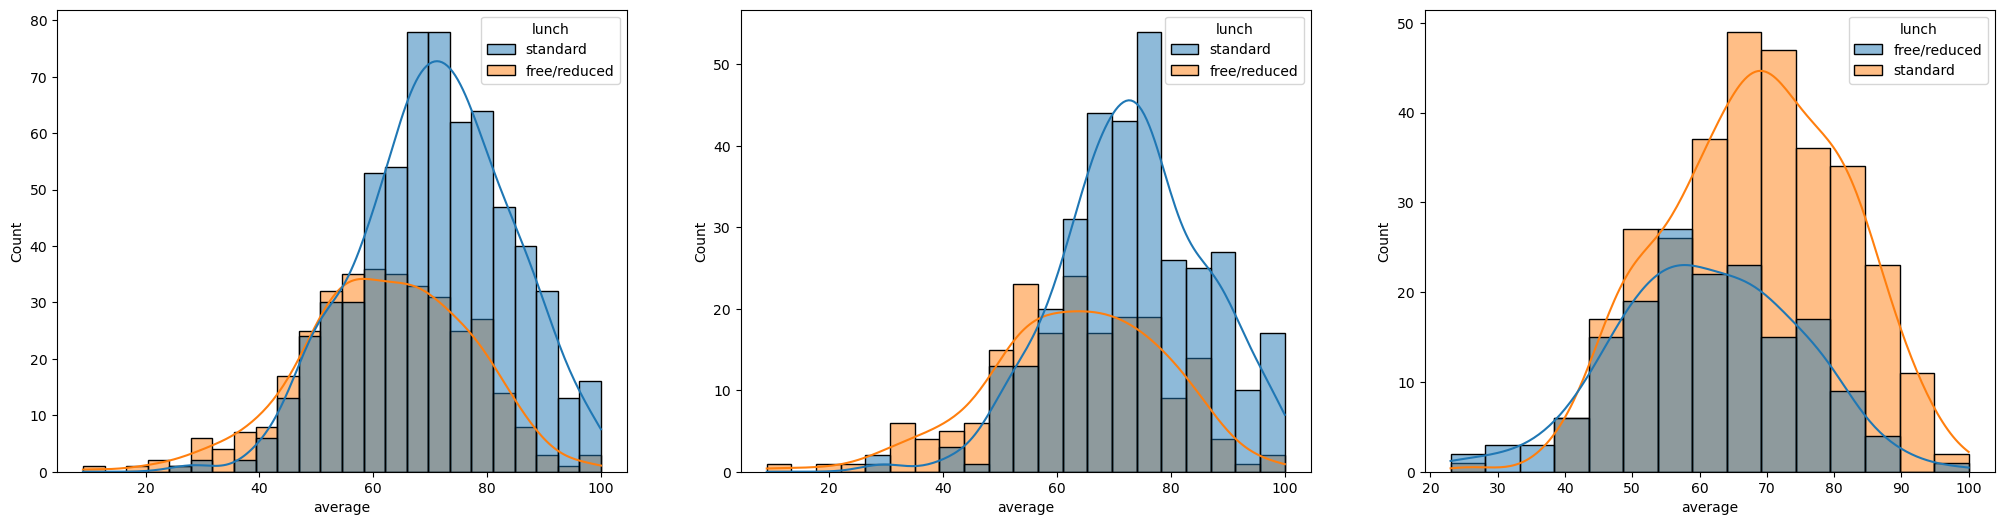

In [18]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df,x='average',kde=True,hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x='average',kde = True,hue='lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x='average',kde = True,hue='lunch')
plt.show()

## Insights
###### - Standard lunch helps perform well in exams
###### - Standard lunch perform well in exams be it a male or female

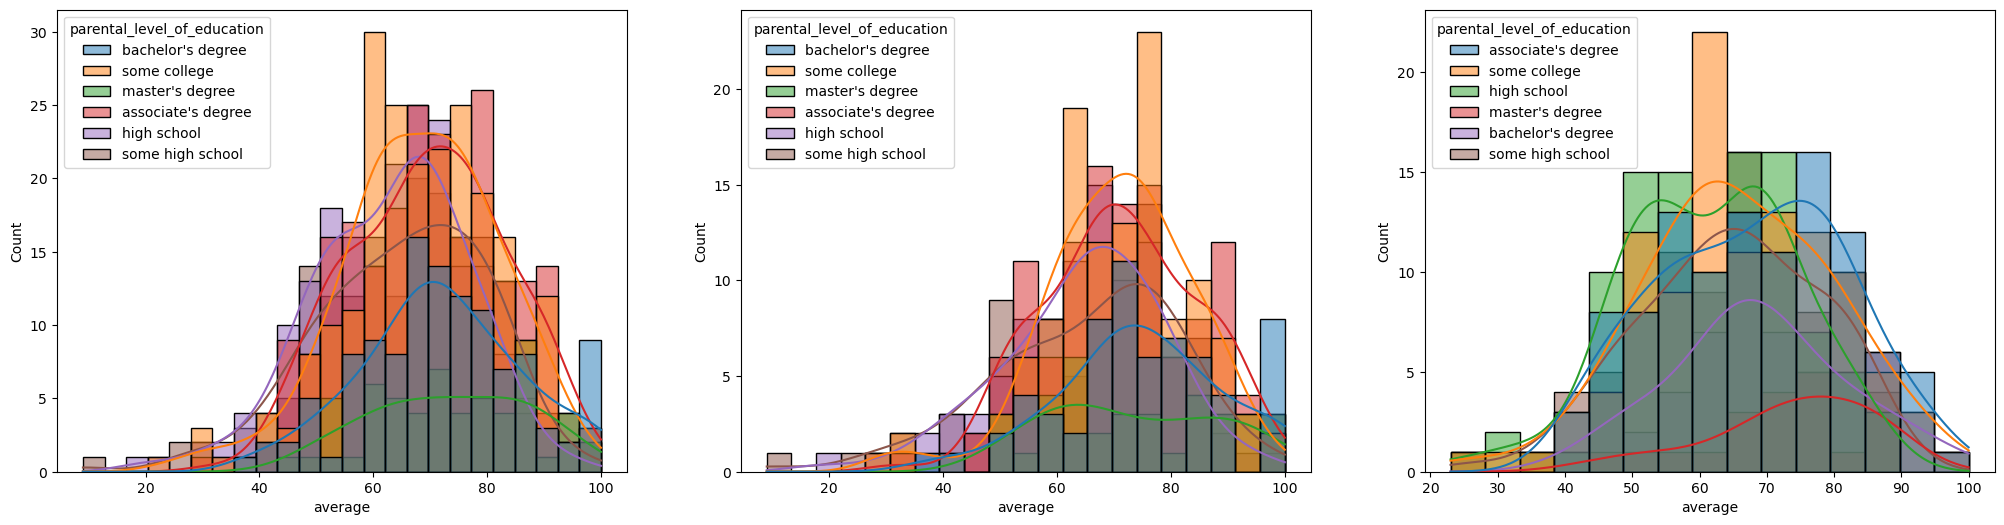

In [19]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df,x='average',kde=True,hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x='average',kde = True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x='average',kde = True,hue='parental_level_of_education')
plt.show()

### Insights
##### - In general, parent's education don't help student perform well in exam.
##### - 2nd plot shows, there is no effect of parental education on female students.
##### - 3rd plot shows, that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

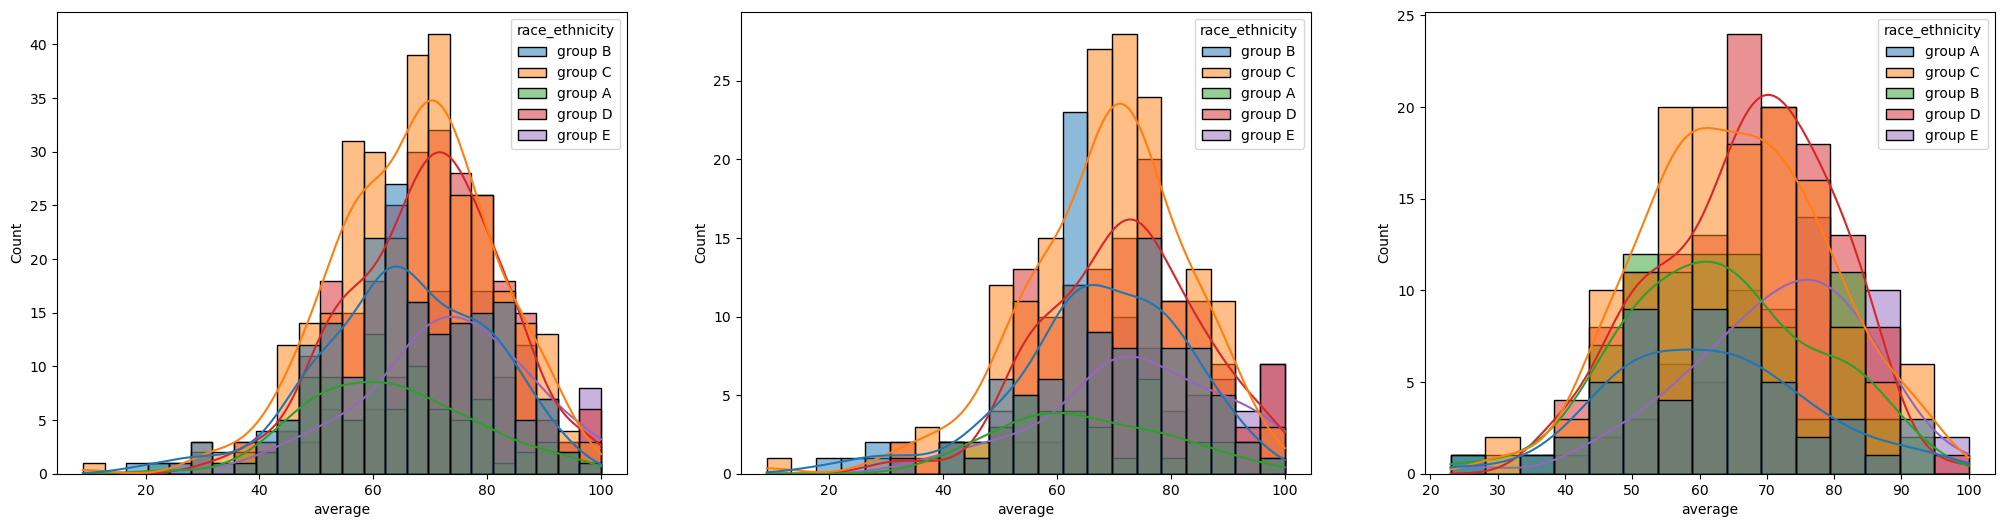

In [20]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data = df,x='average',kde=True,hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'],x='average',kde = True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'],x='average',kde = True,hue='race_ethnicity')
plt.show()

#### Insights
##### - Students of group A and group B tends to perform poorly in exam.
##### - Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
##### - Students of group C tends to perform better in general and irrespective of gender.

### Maximum score of students in all three subjects

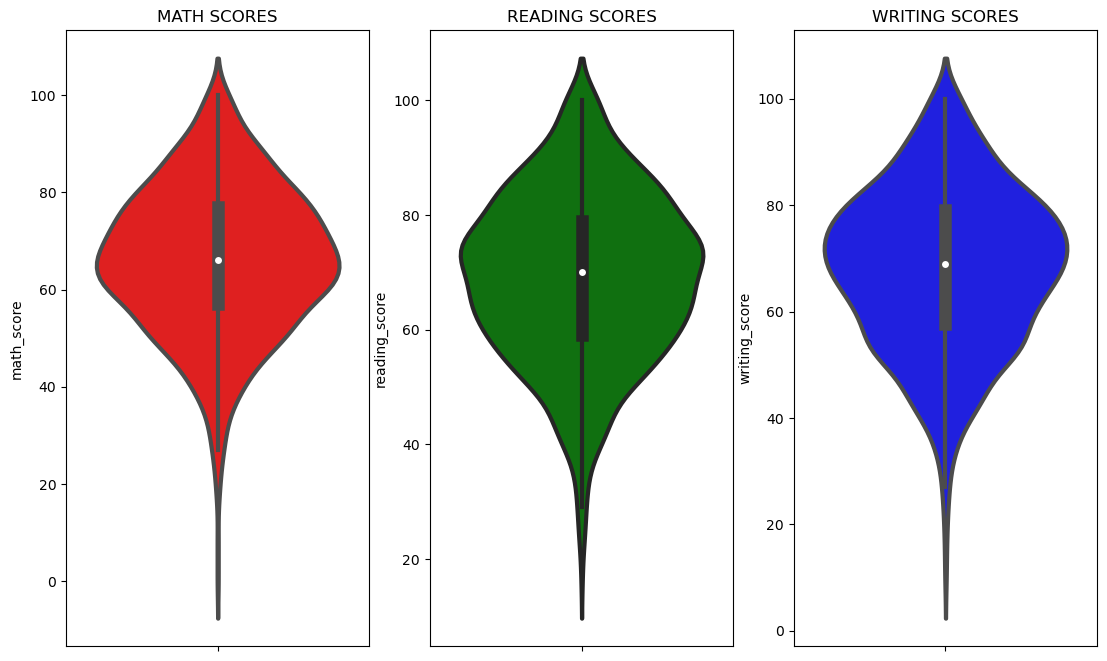

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights:
#### -From the above three plots its clearly visible that most of the students score in between 60-80 for all subjects.

### Multivariate analysis using pieplot

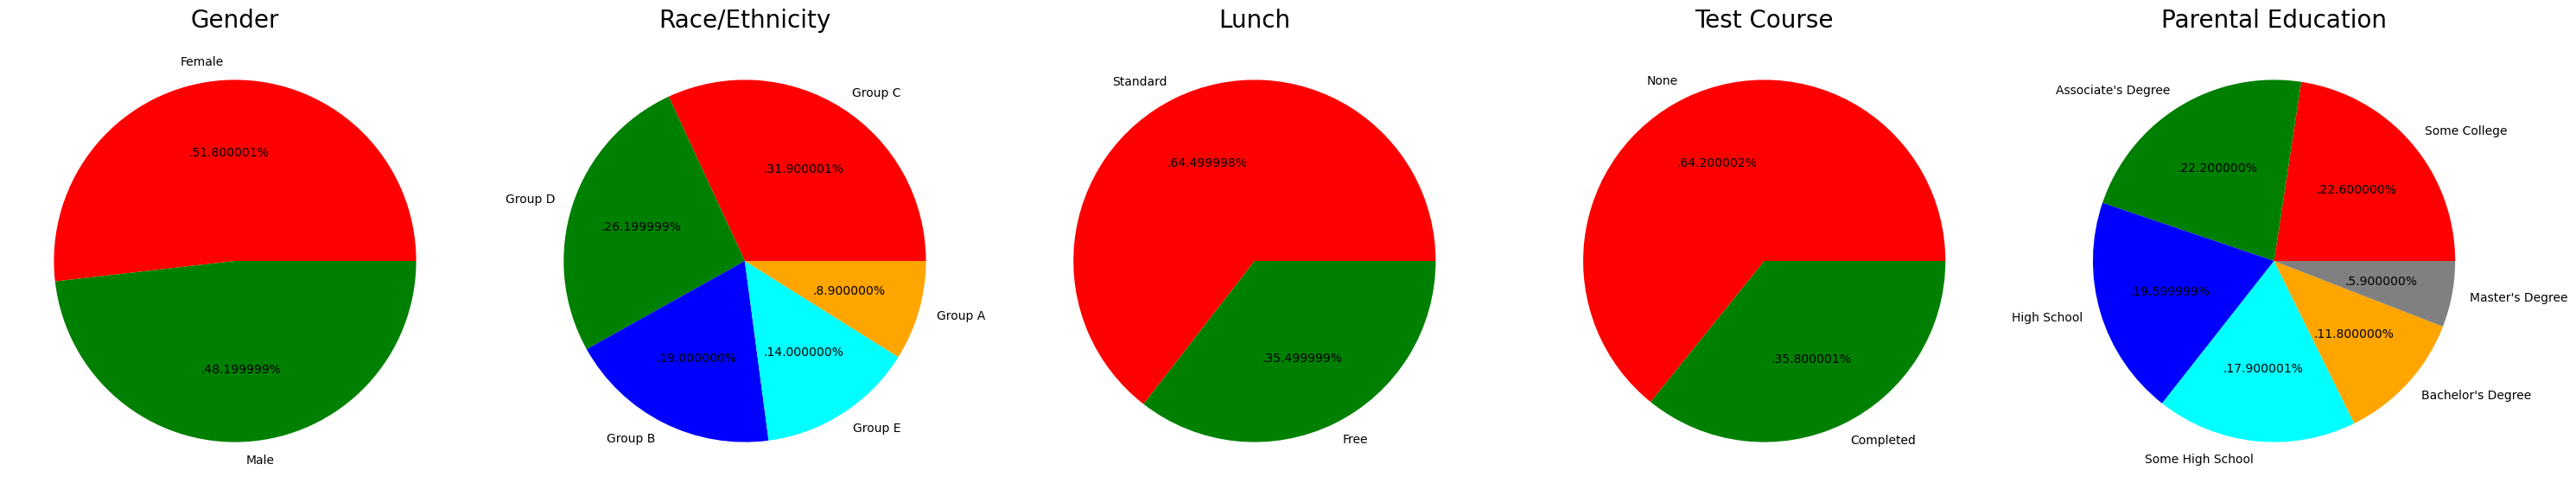

In [27]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
#### -Number of Male and Female students is almost equal
#### -Number students are greatest in Group C
#### -Number of students who have standard lunch are greater
#### -Number of students who have not enrolled in any test preparation course is greater
#### -Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"